# Programming for Data Analysis Assignment 2020

## Purpose of numpy.random package
The numpy.random package is used to generate numpy arrays of pseudo-random numbers, i.e., numbers which approximate randomly generated numbers but are generated using or non-random means[1]. These are innumerable applications for these numbers in science and mathematics. For instance, in machine learning one is often required to split data into train and test sets and the data has to be chosen randomly.

## Use of Simple random data and Permutations functions
### Simple random data
The Simple random data functions consist of the **integers**, **random**, **choice** and **bytes** functions[2]. 
#### Integers
**integers** returns a list of pseudo-random integers in a certain range and returns the list as a numpy array[3]. The range is defined by a low value and a high value input in the function. For instance, to generate a numpy array of 10 pseudo-random integers between 2 and 5:

In [131]:
from numpy.random import Generator, PCG64, SeedSequence
sg = SeedSequence(1234)
seed = sg.spawn(0)
rg = Generator(PCG64(seed)) 
integer_list = rg.integers(low=2, high=5, size=10)

In [132]:
integer_list

array([4, 3, 3, 2, 2, 2, 2, 2, 2, 4], dtype=int64)

#### Random
**random**[4] performs a similar function to **integers** except it returns a numpy array of pseudo-random floats in a certain range rather than integers. For instance, to generate a numpy array of 10 pseudo-random floats between 2 and 5:

In [57]:
float_list = (5-2) *rg.random(10) + 2

In [58]:
float_list

array([2.57463289, 4.92973743, 4.44047221, 4.77711243, 4.23944523,
       4.92649441, 2.12819636, 4.48218573, 4.28445505, 4.8157619 ])

The max and min values for the **random** function are initially 0 and 1. To get floats between 2 and 5, you have to transform the data using the formula:<br> 
(b-a)rg.random(10) + a
where b is the max value of the range (5 in this instance), a is the min value in the range (2 in this instance)

#### Choice
**choice** selects a number of elements from a numpy array in a random order[5]. For instance, to randomly select 5 values from a numpy array of the first 10 numbers (0-9):

In [2]:
import numpy as np
ten_list = np.arange(10)
ten_list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Bytes
**bytes** returns a string of random bytes. For instance, to generate a string of 10 bytes:

In [62]:
rg.bytes(10)

b'\x1d\xc8X\x96\xea[@ph6'

### Permutations
#### Shuffle
**shuffle** rearranges an input numpy array randomly. The function does not return a value, instead it rearranges the input array "in-place" (i.e. the original input array is changed). For instance, to randomly rearrange a numpy array of the first 10 numbers (0-9):

In [83]:
ten_list = np.arange(10)
print(ten_list)
rg.shuffle(ten_list)
print(ten_list)

[0 1 2 3 4 5 6 7 8 9]
[3 5 8 2 4 7 1 9 6 0]


#### Permutation
**permutation** is very similar to **shuffle**, except that it does not rearrange the input array in-place, the original input array is unchanged. Instead, it returns a new numpy array which consists of randomly rearranged elements of the input array. For instance, to generate a numpy array of the randomy rearranged numpy array of the first 10 numbers (0-9):

In [82]:
ten_list = np.arange(10)
print(ten_list)
permuted = rg.permutation(ten_list)
print(permuted, ten_list)

[0 1 2 3 4 5 6 7 8 9]
[0 8 5 2 1 7 4 3 9 6] [0 1 2 3 4 5 6 7 8 9]


## Use and purpose of Distributions functions
### Binomial
The Binomial distribution is a discrete-binary probability distribution with only two outcomes: 0 and 1. An experiment is performed n times and the success or failure of each experiment is represented as 0 or 1. The probability of sucess is represented as p and the probability of failure is 1-p. The mean is np (the median and mode are more complicated and have multiple formulae).
The purpose of the **binomial** function is to generate a numpy array of floats using this distribution. For instance, to generate 100000 binomially distributed random numbers with n=1 and p = 0.3333 (note, when n=1 the binomial distribution equals the Bernoulli distribution):

In [69]:
b = rg.binomial(1, 0.3333, size=100000)
print(b)
print(np.mean(b))
len(b)

[0 0 0 ... 0 1 0]
0.32981


100000

The **binomial** function returns integers as the binomial distribution is discrete.
A visual representation of **binomials**'s functionality is shown as follows:

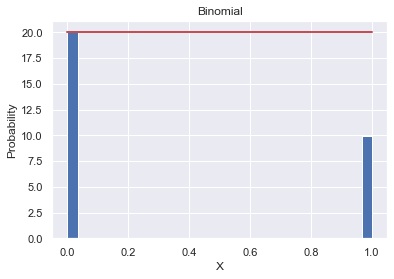

In [90]:
plot_hist_of_dist(b, "X", "Probability", "Binomial", 1, 20)

### Uniform 
The uniform distribution is a probability distribution where each segment of the interval where the distribution is defined on has equal probability with any other segment of the interval. The mean of the distribution is the midpoint of the interval and equals the median. The mode is any value in the interval.
The purpose of **uniform** is to generate a numpy array of floats using this distribution. For instance, to generate 100000 uniformly distributed random numbers greater than or equal to 2 and less than 5:

As can be seen from the histogram, approximately 66% of the values are at 0 and 33% are at 1. 

In [71]:
u = rg.uniform(2, 5, 100000)
print(u)
print(np.mean(u))
len(u)

[3.99647153 3.7923296  3.00691033 ... 2.58913867 2.17369566 4.71804127]
3.503229148261306


100000

The **uniform** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats. To generate integers from a discrete interval between 2 and 5, one should use the **integers** function described previously. **uniform** is very similar to the **random** function previously described.
A visual representation of **uniform**'s functionality is shown as follows:

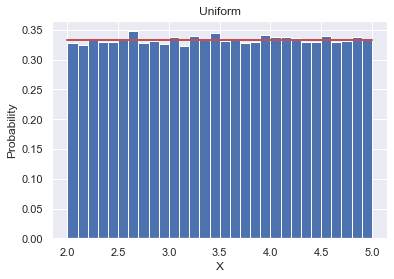

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


def plot_hist_of_dist(input_sample, x_label, y_label, dist_name, bins, highest_ratio):
    count, bins, ignored = plt.hist(input_sample, 30, density=True)

    plt.plot(bins, highest_ratio*np.ones_like(bins), linewidth=2, color='r')

    plt.title(dist_name)

    plt.xlabel(x_label)

    plt.ylabel(y_label)

    plt.show()
    
plot_hist_of_dist(u, "X", "Probability", "Uniform", 30, 0.33333)

Where X is a variable indicating a point along the interval [2,5). As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is approximately equal to the probability for the next segment, and so on for the entirel interval [2,5).
### Normal
The normal distribution is a probability distribution which has a peak around the mean or average value and decreases with distance from the mean. It is symmetric about this mean. In addition, the median (centre) and mode (most common) probability values are identical to the the mean. Approximately 68% of the distribution is located in the interval [-sigma, sigma] (where sigma is the standard deviation), 95% is located in the interval [-2sigma, sigma] and 99.7% is located in the interval [-3sigma, 3*sigma]. 
The purpose of the **normal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 normally distributed random numbers between 2 and 5 with mean 2.5 and standard deviation 0.1:

In [53]:
n = np.random.default_rng().normal(2.5, 0.1, 100000)
print(n)
print(np.mean(n))
print(np.median(n))
print(len(n))

[2.43521203 2.59159182 2.4369968  ... 2.38254194 2.59877511 2.42631642]
2.5000064735677063
2.5000043354763384
100000


The **normal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **normal**'s functionality is shown as follows:

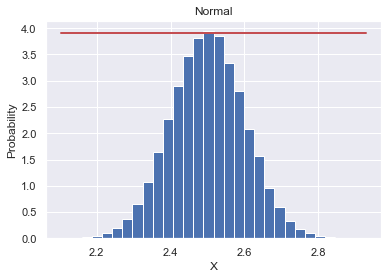

In [92]:
plot_hist_of_dist(n, "X", "Probability", "Normal", 30, 3.9)

As can be seen from the histogram, the probability for each segment (divided here into bins of length 0.1) is largest for the mean value X=2.5 and decreases gradually as X becomes smaller or larger than the mean. As X approaches 2.8 and 2.2. the probability becomes very small as 99.7% of the distribution is located in the interval [mu - 3sigma, mu+3sigma] which is [2.2, 2.8]
### Log-normal
The log-normal distribution is a distribution where its natural log (log<sub>e</sub>) is normally distributed. It is a left skewed distribution (i.e. the mode is less than the median which is less than the mean).
The purpose of the **lognormal** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 normally distributed random numbers between 2 and 5 with mean 2.5 and standard deviation 0.25:

In [105]:
ln = rg.lognormal(2.5, 0.25, 100000)
print(ln)
print(np.mean(ln))
print(np.median(ln))
print(len(n))

[ 9.61642039  9.25961249 11.14302021 ... 15.15370765 12.11422939
 16.70062873]
12.569940085715384
12.188520519713329
100000


The **lognormal** function assumes that the interval between 2 and 5 is continuous, not discrete and returns floats.
A visual representation of **lognormal**'s functionality is shown as follows:

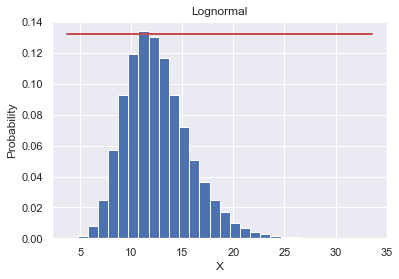

In [110]:
plot_hist_of_dist(ln, "X", "Probability", "Lognormal", 15, 0.132)

The left-skewed nature of the distribution can be seen from the histogram
### Exponential
The exponential function is a probability distribution which describes the time between events in a process where events happen continuously. The events are independant of each other and occur at a constant average rate.
The purpose of the **exponential** function is to generate a numpy array of floats using this distribution. For instance, to generate 10000 exponentially distributed random numbers with mean 2:

In [111]:
e = rg.exponential(2, size=100000)
print(e)
print(np.mean(e))
print(np.median(e))
print(len(e))

[0.40701006 2.695794   0.54169577 ... 0.70812717 0.84607904 0.33901074]
1.9997474881306931
1.3841394887794118
100000


The **exponential** function assumes continuous not discrete probabilities and returns floats.
A visual representation of **exponetial**'s functionality is shown as follows:

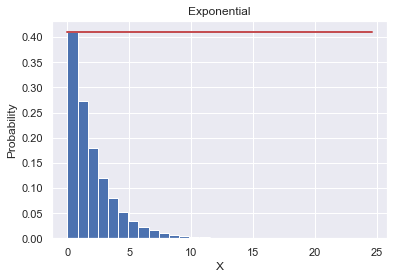

In [118]:
plot_hist_of_dist(e, "X", "Probability", "Exponential", 30, 0.41)

Like the log normal distribution, it is left-skewed as can be seen from the histogram

## Seeds
A seed specifies a starting point in a pattern that a computer uses to generate pseudorandom numbers. The seed is usually taken from the seconds on a computer's clock. This ensures that no two seeds are identical.
An example of a pattern is done using the irrational number pi (3.141592654...). The digits of pi has no regular pattern so is good for pseudorandom number generation. An example pattern acting on pi is take the seed X, add it to 50 and use the (X+50)th digit of pi as the first random number. Than substract 37 from that to get the second number, and so on.
(Note: this is a simple example pattern, in practice computers use more complicated patterns based on the Bernoulli or Poisson distribution).
While no two seeds are identical, they are preset initially when on is generating pseudorandom numbers. This is useful because if one has the seed for a particular set of pseudorandom numbers, they can replicate the exact same set of pseudorandom numbers for testing purposes. For instance, at the start of this Jupyter Notebook the numpy array *integer_list* was generated using the **integers** function. It can be generated again using the generator **rg** which has the same seed:

In [134]:
print(integer_list)
sg = SeedSequence(1234)
seed = sg.spawn(0)
rg = Generator(PCG64(seed)) 
integer_list2 = rg.integers(low=2, high=5, size=10)
print(integer_list)

[4 3 3 2 2 2 2 2 2 4]
[4 3 3 2 2 2 2 2 2 4]
